<a href="https://colab.research.google.com/github/rajibbanerjee/deeplearning/blob/master/SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.colors
import pandas as pd
import numpy as np

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

#Class for Sigmoid Neuron

In [0]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
    
    for i in range(epochs):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)       
      self.w -= learning_rate * dw
      self.b -= learning_rate * db

#Fit for toy data

In [0]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [0]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)

In [0]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
  ax.scatter(X[:,0], X[:,1],c=Y, cmap=my_cmap)
  ax.plot()

[[-0.69003377  1.24537066]] [0.00123071]
[[-0.57837971  1.24603441]] [0.01293331]
[[-0.44948345  1.22279332]] [0.02005405]
[[-0.27505565  1.17143861]] [0.02538536]
[[0.00507553 1.07314351]] [0.03284715]
[[0.49465679 0.8871663 ]] [0.0459954]
[[0.75583781 0.70011169]] [0.03573999]
[[0.85982907 0.46024909]] [0.06208779]
[[0.94177005 0.07369525]] [0.11147009]
[[ 0.93697207 -0.35570527]] [0.07755793]
[[ 1.03920998 -0.3114805 ]] [0.00920964]
[[ 1.08581745 -0.39740737]] [-0.05543643]
[[ 1.16580939 -0.36240039]] [-0.10979055]
[[ 1.20607511 -0.42157791]] [-0.16132872]
[[ 1.26553105 -0.40906637]] [-0.20563078]
[[ 1.30487738 -0.44022035]] [-0.24713758]
[[ 1.34939073 -0.44498072]] [-0.2841413]
[[ 1.38650152 -0.46090941]] [-0.31843819]
[[ 1.42264397 -0.4710224 ]] [-0.34984334]
[[ 1.45582406 -0.48205654]] [-0.37894086]
[[ 1.48707549 -0.49196264]] [-0.40593825]
[[ 1.5164353 -0.5013748]] [-0.43109912]
[[ 1.54414271 -0.51024143]] [-0.45462468]
[[ 1.57036086 -0.51863423]] [-0.47669129]
[[ 1.59523589 -0.

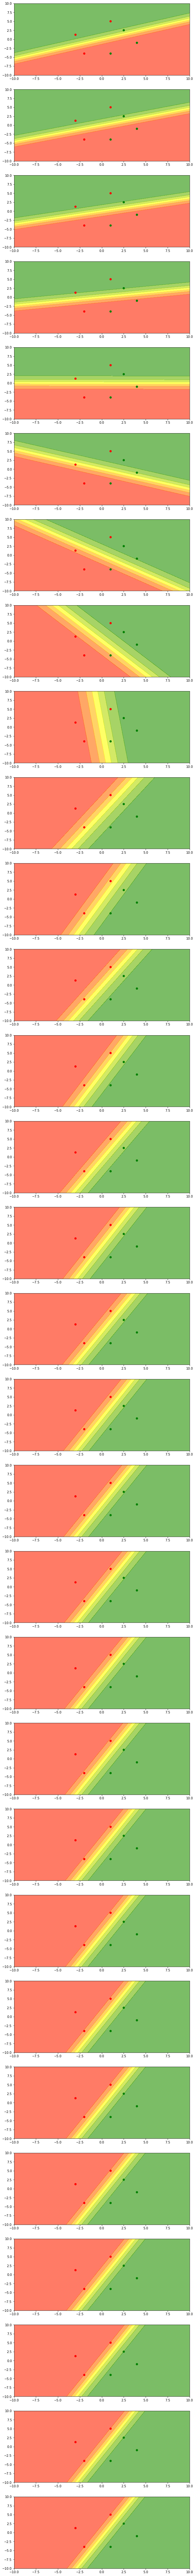

In [9]:
sn.fit(X, Y, 1, 0.05, True)
N = 30
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i + 1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.5, False)